In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, RobustScaler

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Get the numerical variables from our dataset.

In [4]:
numerical_df = customer_df.select_dtypes(include=['int', 'float'])

numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


### Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

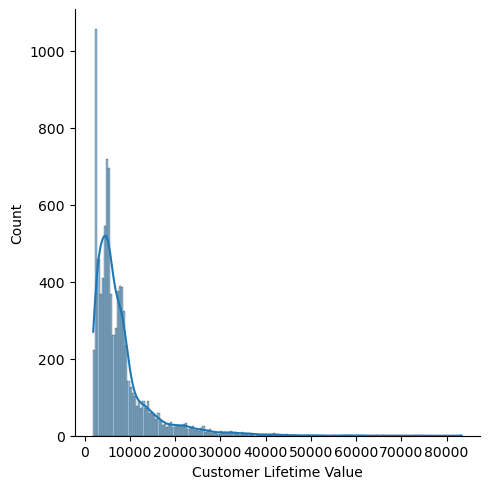

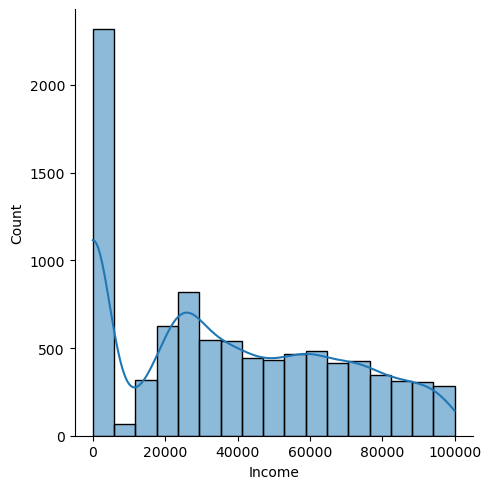

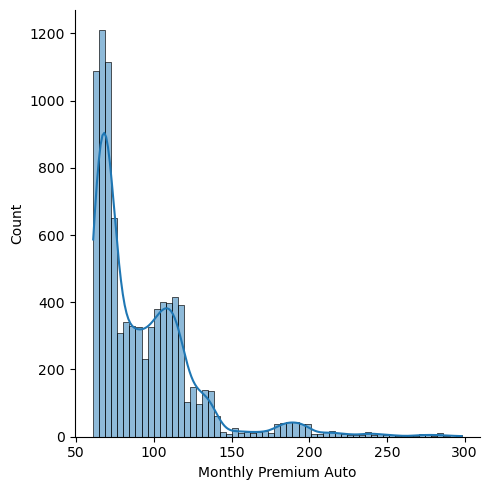

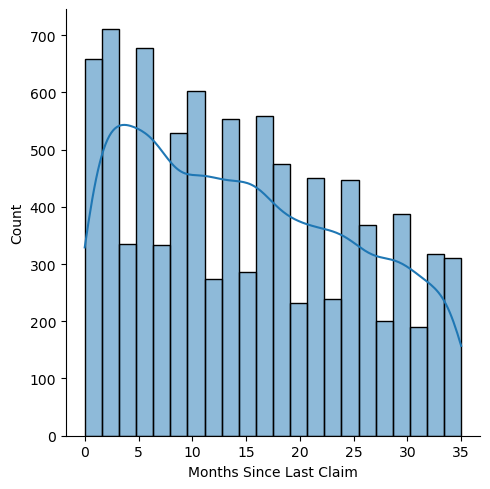

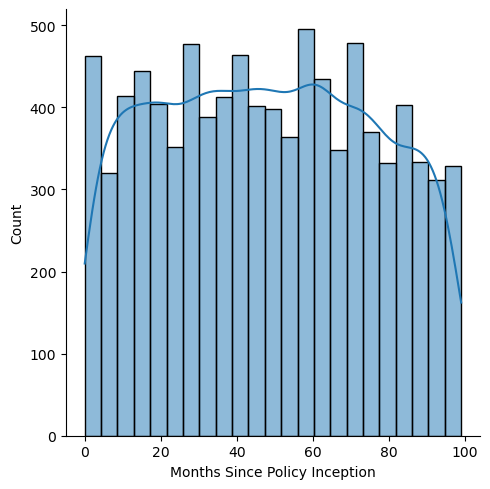

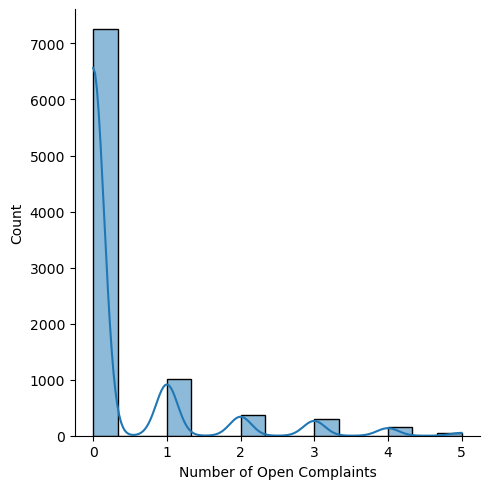

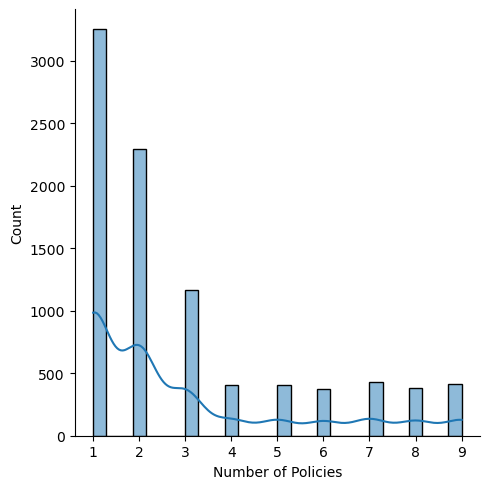

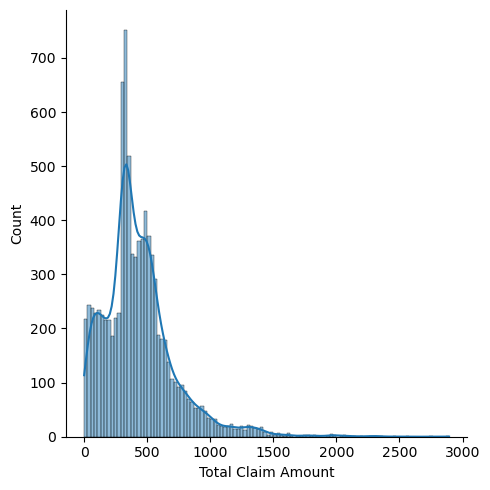

In [5]:
for col in numerical_df.columns:
    sns.displot(numerical_df[col], kde=True)

* Customer Lifetime Variable follows a very left-skewed distribution, close to an exponential one. 
* Income follows a relatively normal distribution, with the exception of customers having 0 income, where we see high frequencies. 
* Monthly premium auto also follows an exponential distribution. 
* Months since last claim follows a downward distribution.
* Months since policy inception follows a normal distribution
* Number of open complaints follows an exponential distribution.
* Number of policies follows an exponential distribution.
* Total claim amount follows a left skewed normal distribution.

### Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

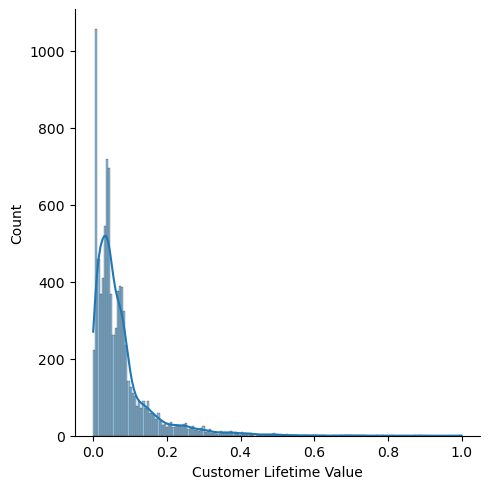

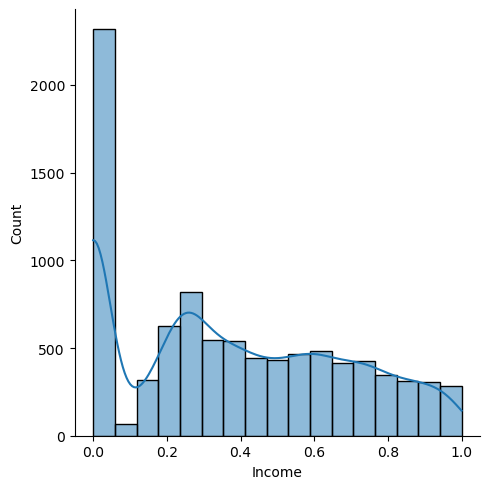

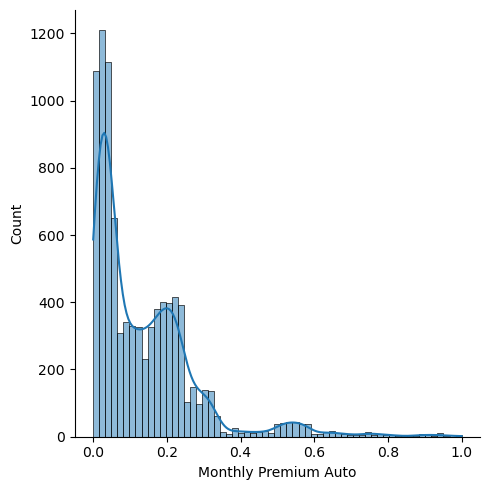

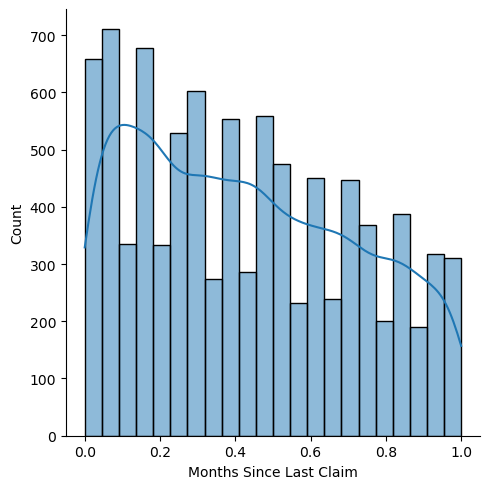

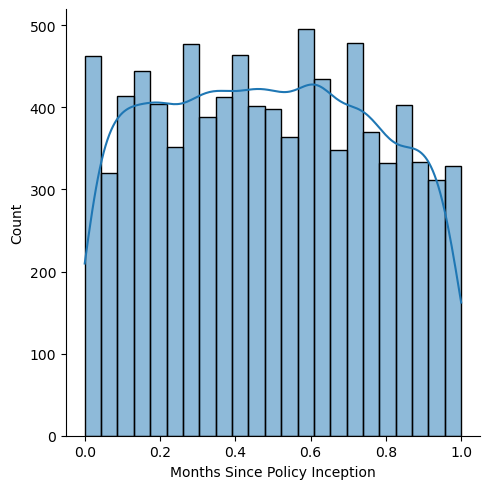

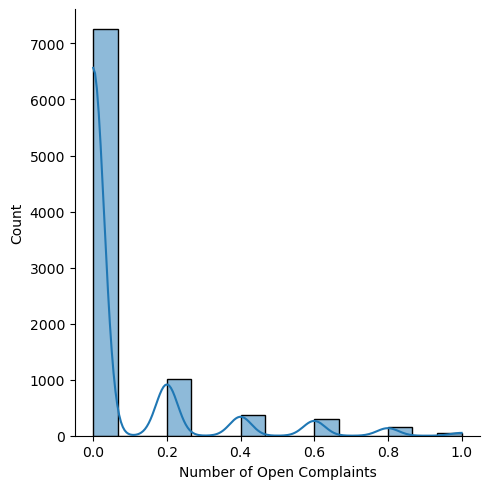

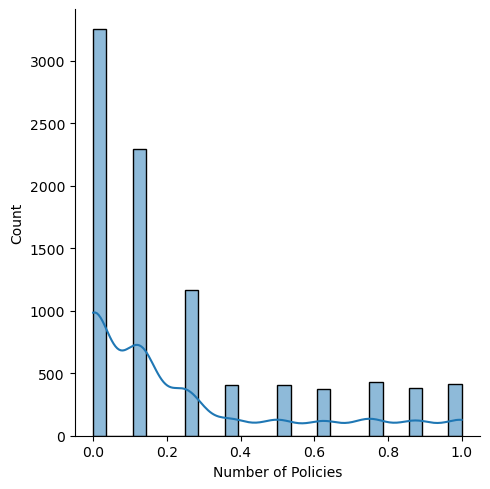

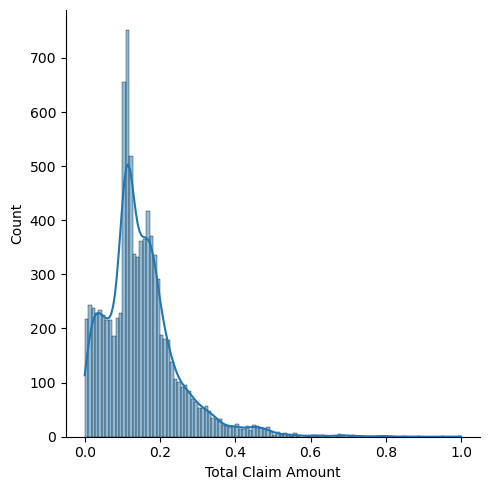

In [6]:
# Apply MinMaxScaler to numerical_df
minmax_scaler = MinMaxScaler()
num_minmax = pd.DataFrame(minmax_scaler.fit_transform(numerical_df), columns=numerical_df.columns)

for col in num_minmax.columns:
    sns.displot(num_minmax[col], kde=True)

We can see that normalizing the data does not fundamentally change the distribution plots for these variables.

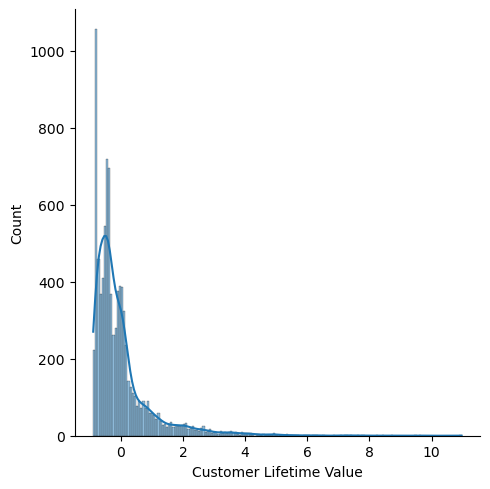

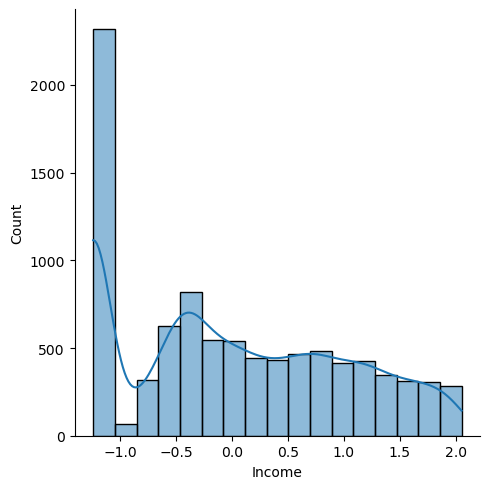

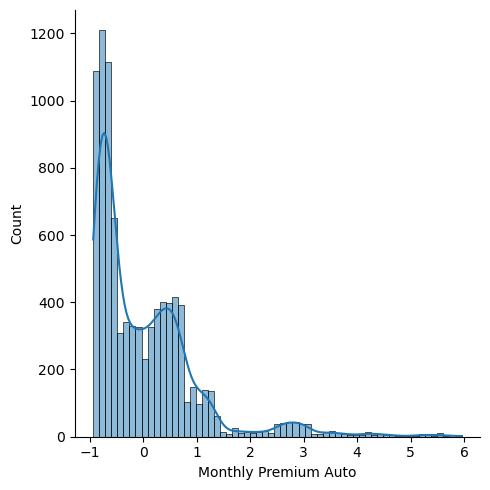

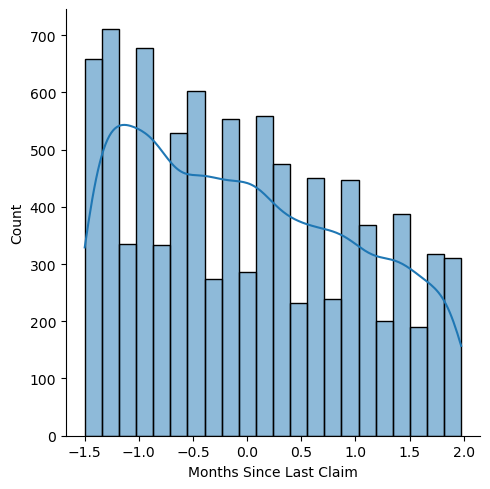

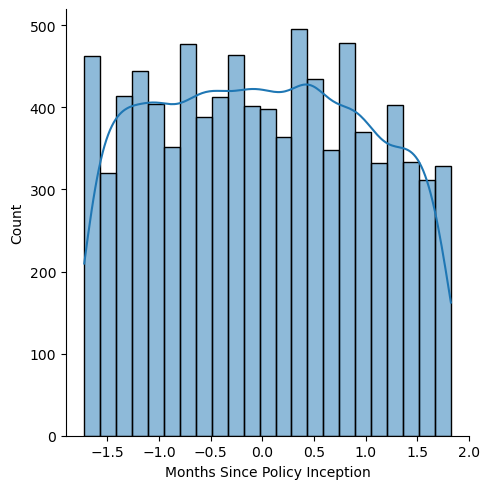

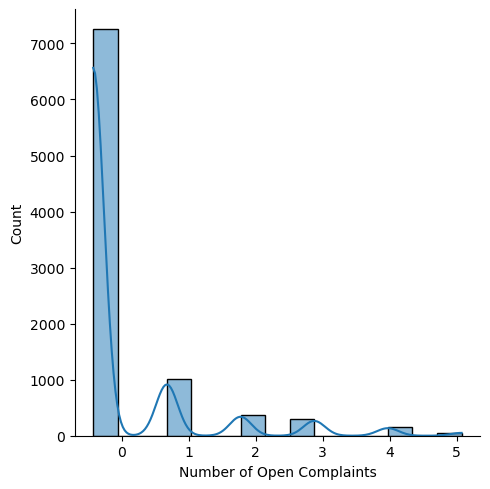

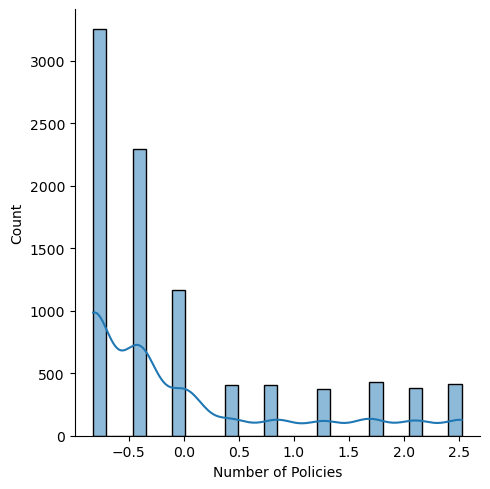

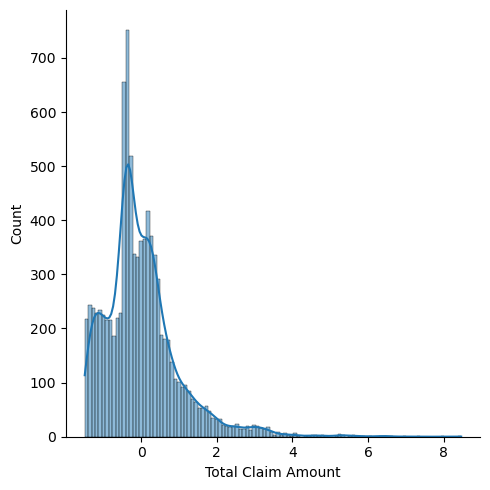

In [7]:
# Apply StandardScaler to numerical_df
standard_scaler = StandardScaler()
num_standard = pd.DataFrame(standard_scaler.fit_transform(numerical_df), columns=numerical_df.columns)

for col in num_standard.columns:
    sns.displot(num_standard[col], kde=True)

Similarly, standardasing the data does not fundamentally alter the distributions of the data. 

/Users/jesusb/anaconda3/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


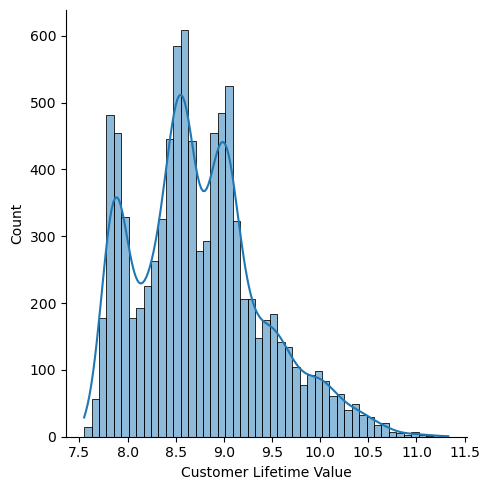

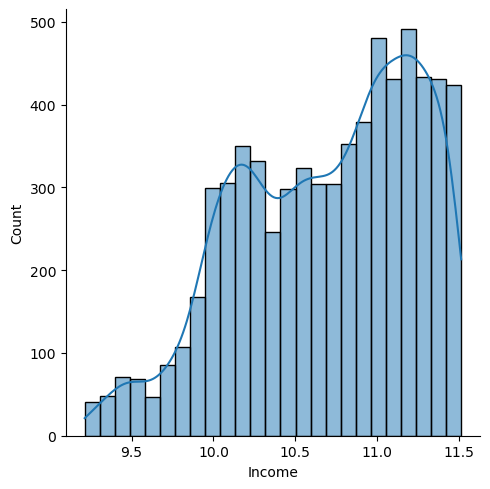

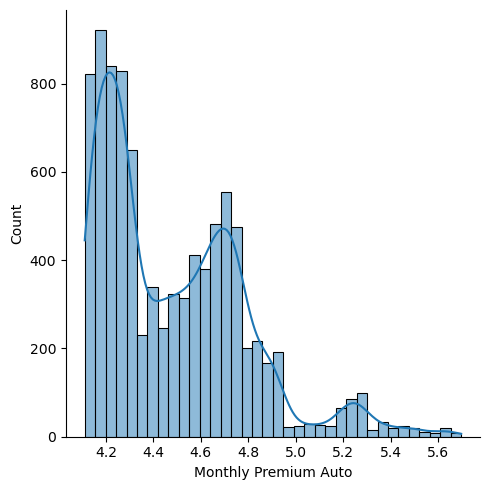

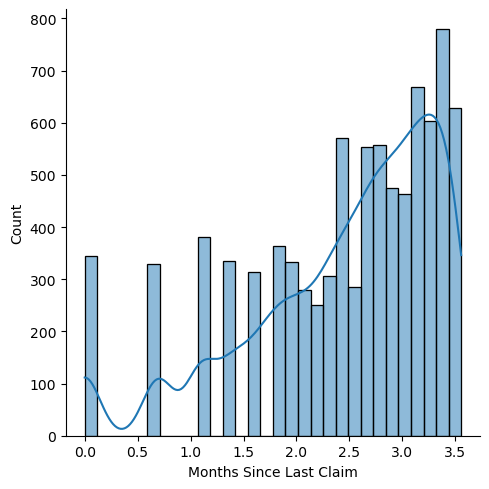

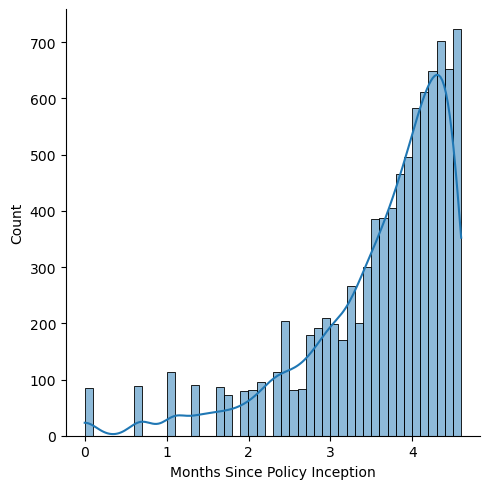

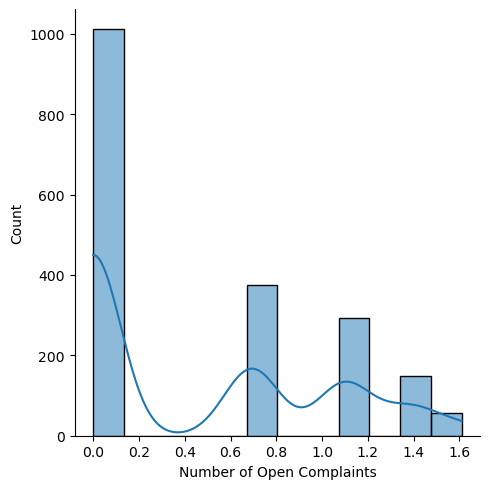

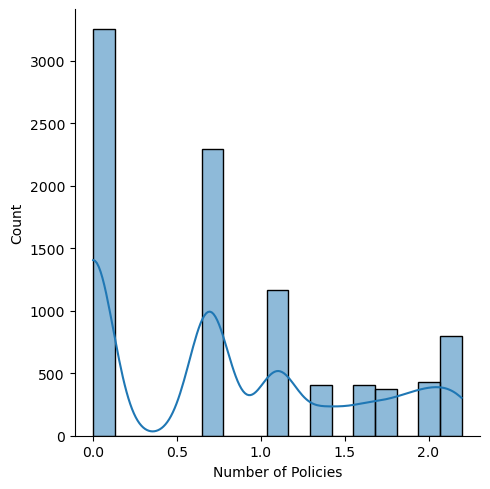

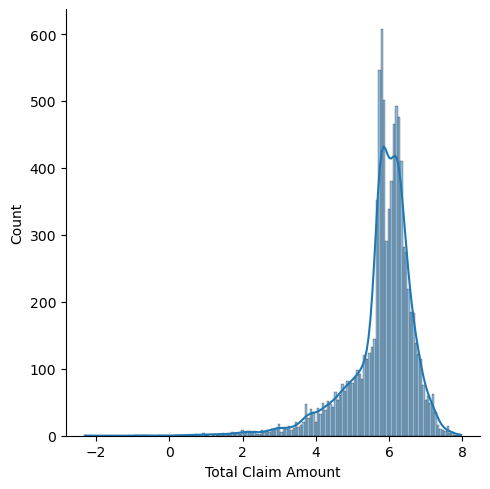

In [13]:
# Apply Log transformation to numerical_df
num_log = np.log(numerical_df)

for col in num_log.columns:
    sns.displot(num_log[col], kde=True)

Applying the log transformation does create some changes:
    * Customer lifetime value becomes much closer to a normal distribution.
    * Income becomes closer to an exponential distribution.
    * Monthly premium auto becomes less exponential. 
    * Months since last claim / policy inception become a lot more exponential.
    * Total Claim Amount become more normal.